In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.drop('Id',axis=1,inplace=True)

In [ ]:
df.sample(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
36,5.5,3.5,1.3,0.2,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
106,4.9,2.5,4.5,1.7,Iris-virginica


In [ ]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
df['Species']=df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [ ]:
df.sample(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,1
134,6.1,2.6,5.6,1.4,2
126,6.2,2.8,4.8,1.8,2


In [ ]:
from sklearn.model_selection import train_test_split
features=df.drop(['Species'],axis=1)
target=df['Species']
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain_ss=scaler.fit_transform(xtrain)
xtest_ss=scaler.transform(xtest)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=4))
model.add(Dense(3,activation='softmax'))     #sigmoid is for binary and for multiclass its softmax

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 11)                  │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])   # loss = sparse_categorical_crossentropy for multiclass classification
                                                                                # for regression loss = mse

In [ ]:
history=model.fit(xtrain_ss,ytrain,batch_size=10,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3524 - loss: 1.0518 - val_accuracy: 0.5417 - val_loss: 0.9986
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4470 - loss: 1.0441 - val_accuracy: 0.5417 - val_loss: 0.9713
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6001 - loss: 0.9967 - val_accuracy: 0.6250 - val_loss: 0.9411
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7290 - loss: 0.9593 - val_accuracy: 0.6250 - val_loss: 0.9143
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6821 - loss: 0.9295 - val_accuracy: 0.6250 - val_loss: 0.8892
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7001 - loss: 0.9166 - val_accuracy: 0.6667 - val_loss: 0.8648
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7277 - loss: 0.8818 - val_accuracy: 0.7083 - val_loss: 0.8386
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7163 - loss: 0.8470 - val_accuracy: 0.7917 - val_los

In [ ]:
ypred = model.predict(xtest_ss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


In [ ]:
ypred

array([[0.19468802, 0.42345378, 0.38185826],
       [0.5382641 , 0.17008074, 0.29165518],
       [0.04875052, 0.35896054, 0.5922889 ],
       [0.22894986, 0.38082084, 0.39022928],
       [0.15215895, 0.41751975, 0.43032122],
       [0.52355725, 0.21786156, 0.25858116],
       [0.330129  , 0.34044543, 0.32942566],
       [0.14743297, 0.22197354, 0.6305934 ],
       [0.11617266, 0.3865231 , 0.49730417],
       [0.24816236, 0.38563928, 0.36619833],
       [0.21681133, 0.25724134, 0.5259474 ],
       [0.50482833, 0.25612628, 0.2390453 ],
       [0.5423291 , 0.20507386, 0.25259715],
       [0.49628398, 0.2613944 , 0.24232157],
       [0.56665933, 0.16433439, 0.26900628],
       [0.30114523, 0.27769864, 0.42115608],
       [0.15049803, 0.30105934, 0.5484426 ],
       [0.23800953, 0.3893396 , 0.37265092],
       [0.2358922 , 0.38820428, 0.37590355],
       [0.13193701, 0.33033445, 0.53772855],
       [0.50621575, 0.25194466, 0.24183962],
       [0.22024694, 0.3327943 , 0.44695875],
       [0.

In [ ]:
ypred_class = np.argmax(ypred, axis=1)

In [ ]:
accuracy = accuracy_score(ytest, ypred_class)
print("Accuracy:", accuracy)

Accuracy: 0.8666666666666667


Text(0, 0.5, 'loss')

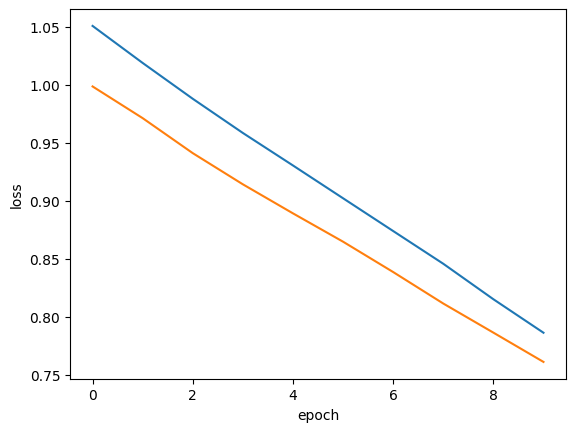

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')